In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y = fetch_california_housing(return_X_y=True)

In [ ]:
X.shape

(20640, 8)

In [ ]:
y.shape

(20640,)

Dividing the dataset into training and testing sets

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

X_train.shape, X_test.shape

((16512, 8), (4128, 8))

Applying LinearRegression Model

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.6013853272055167

Applying Scaling operation as there are very different scales in the dataset

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Applying Stochastic Gradient Descent

In [ ]:
class SGDRegressor:
  def __init__(self, learning_rate, epochs):
    self.lr = learning_rate
    self.epochs = epochs
    self.intercept_ = None
    self.coef_ = None
    self.loss_history = []  # Only track loss
    self.r2_history = []

  def fit(self, X_train, y_train):
    # Initialzing intercept and coefficient with 0 and 1 respectively.
    self.intercept_ = 0
    self.coef_ = np.ones(X_train.shape[1])

    # Updating intercept
    for i in range(self.epochs):
      epoch_loss = 0
      for j in range(X_train.shape[0]):
        idx = np.random.randint(0, X_train.shape[0])
        y_hat = np.dot(X_train[idx], self.coef_) + self.intercept_
        error = y_train[idx] - y_hat
        epoch_loss += error**2

        intercept_der = -2 * (y_train[idx] - y_hat)
        self.intercept_ = self.intercept_ - (self.lr * intercept_der)

        coef_der = -2 * np.dot((y_train[idx] - y_hat), X_train[idx])
        self.coef_ = self.coef_ - (self.lr * coef_der)
        self.loss_history.append(epoch_loss/X_train.shape[0])  # Average loss

  def predict(self, X_test):
    return np.dot(X_test, self.coef_) + self.intercept_

In [ ]:
sgd = SGDRegressor(learning_rate=0.0001, epochs=100)
sgd.fit(X_train, y_train)

In [ ]:
y_pred = sgd.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.6042868463031448

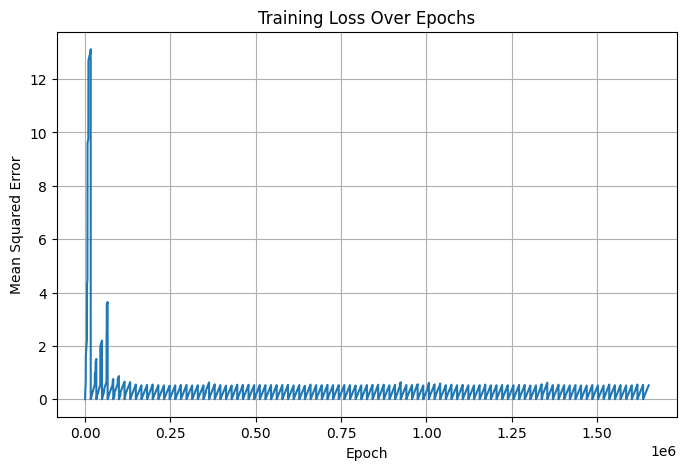

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(sgd.loss_history)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()